
### For more information, see https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html

In [1]:

#!pip install opencv-python==3.4.2.16

#!pip install opencv-contrib-python==3.4.2.16

In [2]:
%matplotlib inline

from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse

from matplotlib import pyplot as plt
print("OpenCV Version : %s " % cv.__version__)

OpenCV Version : 3.4.2 


In [3]:
img1 = cv.imread('box.png', cv.IMREAD_GRAYSCALE)
print(img1.shape)

(223, 324)


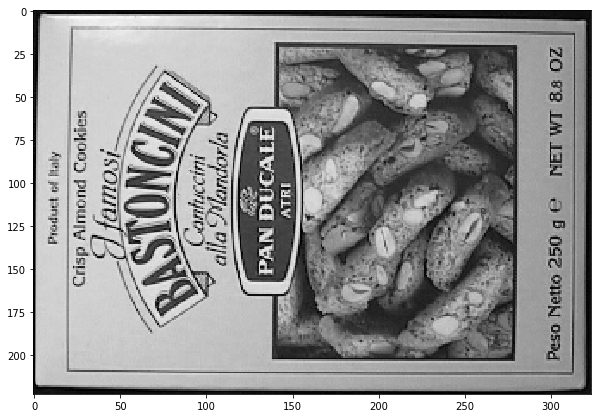

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(img1,cmap='gray')
plt.show()

In [5]:
img2 = cv.imread('box_in_scene.png', cv.IMREAD_GRAYSCALE)
print(img2.shape)

(384, 512)


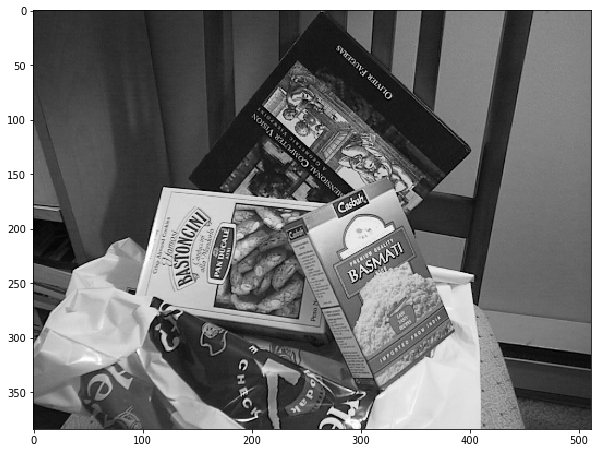

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(img2,cmap='gray')
plt.show()

In [7]:
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 400
detector = cv.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)


In [8]:
print(len(keypoints1),len(keypoints2))

786 1040


In [9]:
print(descriptors1.shape)
print(descriptors2.shape)


(786, 64)
(1040, 64)


In [10]:
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)


In [11]:
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)


In [12]:
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)


In [13]:
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)


In [14]:
results=cv.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, img_matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


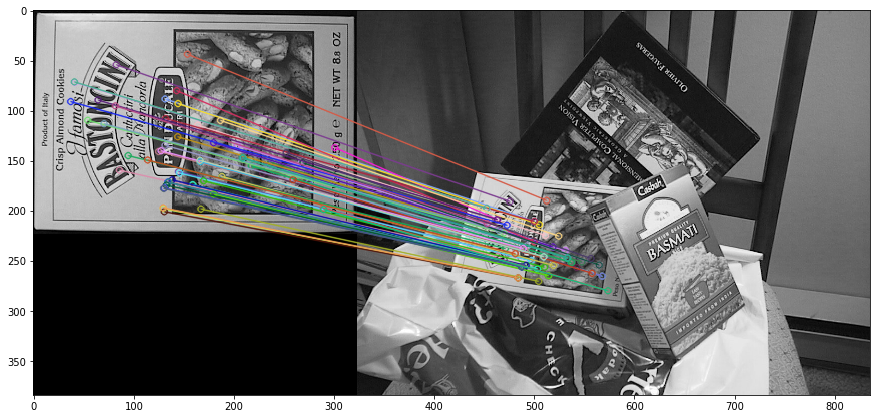

In [18]:
#-- Show detected matches
fig = plt.figure(figsize=(15, 15))
plt.imshow(img_matches)